In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [86]:
X,y = make_blobs(n_samples=500,centers=5,random_state=3)

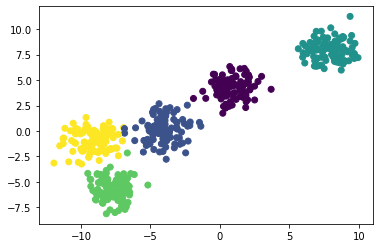

In [87]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [88]:
k=5
colors=["yellow","green","blue","orange","red"]
clusters={}
for kn in range(k):
    center = 10 * ( 2 * np.random.random(( X.shape[1] ,)) -1)
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color':colors[kn]
    }
    clusters[kn]=cluster

In [89]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [90]:
#Expectation And Minimization Algorithm
def assignPointsToCluster(clusters): #E step
    for i in range(X.shape[0]):
        dist=[]
        curr_x = X[i]
        for kn in range(k):
            d = distance(curr_x,clusters[kn]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): #M Step -> We try to update every cluster center according to the mean
    for kn in range(k):
        pts = np.array(clusters[kn]['points'])
        
        if pts.shape[0]>0:
            new_mu = pts.mean(axis = 0) 
            clusters[kn]['center'] = new_mu
            clusters[kn]['points'] = []

def plotClusters(clusters):
    for kn in range(k):
        pts = np.array(clusters[kn]['points'])
        center = np.array(clusters[kn]['center'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[kn]['color'])
        except:
            pass
        plt.scatter(center[0],center[1],c='black',marker='*',s=100)
        

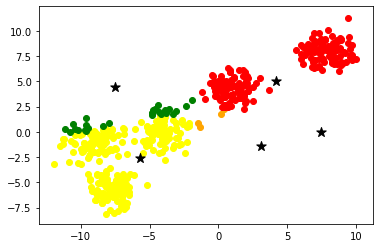

In [91]:
assignPointsToCluster(clusters)
plotClusters(clusters)

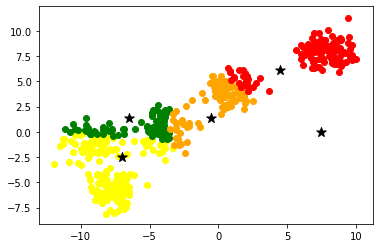

In [92]:
updateClusters(clusters)
assignPointsToCluster(clusters)
plotClusters(clusters)